In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [4]:
X = x.reshape(-1, 1)

In [5]:
X.shape

(100, 1)

In [9]:
y.shape

(100,)

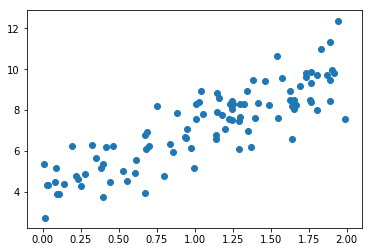

In [8]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降训练

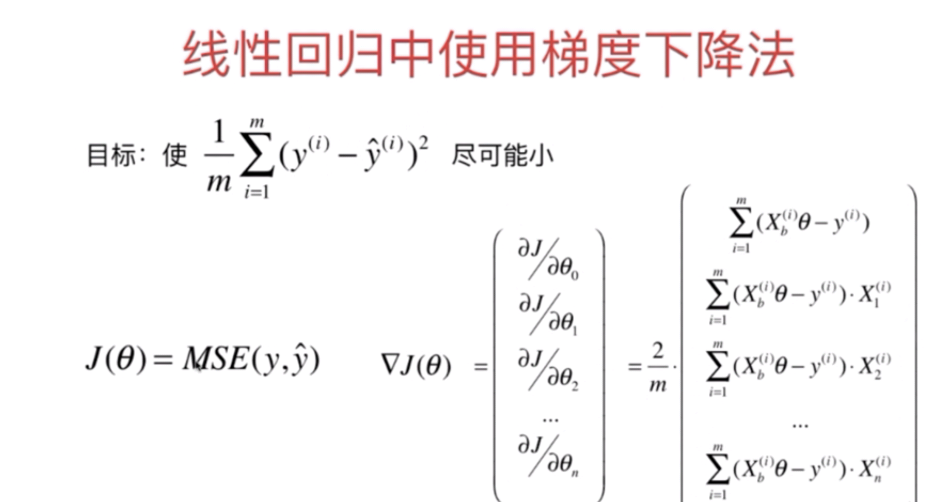

In [11]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [12]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)


In [14]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
#     theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient 

#         theta_history.append(theta)
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter +=1    
    return theta 

In [29]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [30]:
theta

array([4.13445504, 2.90104526])

### 封装自定义梯度下降求解线性回归算法

In [31]:
%run LinearRegression.py

In [32]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)


LinearRegression()

In [33]:
lin_reg.coef_

array([2.90104526])

In [34]:
lin_reg.intercept_

4.134455044945941